<table> <tr>
        <td  style="background-color:#ffffff;">
            <a href="http://qworld.lu.lv" target="_blank"><img src="..\images\qworld.jpg" width="25%" align="left"> </a></td>
        <td style="background-color:#ffffff;vertical-align:bottom;text-align:right;">
            prepared by <a href="http://abu.lu.lv" target="_blank">Abuzer Yakaryilmaz</a> (<a href="http://qworld.lu.lv/index.php/qlatvia/" target="_blank">QLatvia</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

<h2> <font color="blue"> Solutions for </font>Rotations</h2>

<a id="task2"></a>
<h3> Task 2 </h3>

Start with state $ \ket{0} $. 

Apply $ R(\pi/4) $ 7 times, and draw each state on the unit circle.

<h3>Solution</h3>

In [ ]:
%run qlatvia.py

draw_qubit()

[x,y]=[1,0]

draw_quantum_state(x,y,"v0")

sqrttwo = 2**0.5
oversqrttwo = 1/sqrttwo

R = [ [oversqrttwo, -1*oversqrttwo], [oversqrttwo,oversqrttwo] ]

# function for rotation R
def rotate(px,py):
    newx = R[0][0]*px + R[0][1]*py
    newy = R[1][0]*px + R[1][1]*py
    return [newx,newy]

# apply rotation R 7 times
for i in range(1,8):
    [x,y] = rotate(x,y)
    draw_quantum_state(x,y,"|v"+str(i)+">")


<a id="task3"></a>
<h3> Task 3 </h3>

We implement Task 2 by using "ry-gate" and "statevector_simulator".

Define a quantum circuit with one qubit. 

Iterate seven times
- Apply the rotation with angle $ \pi \over 4 $ by using ry-gate
- Read the current quantum state
- Print the current quantum state
- Draw the quantum state on the unit circle by using the values of the current quantum state

<h3>Solution</h3>

iteration 1 : the quantum state is ( 0.707 ) |0> +( 0.707 ) |1>
iteration 2 : the quantum state is ( 0.0 ) |0> +( 1.0 ) |1>
iteration 3 : the quantum state is ( -0.707 ) |0> +( 0.707 ) |1>
iteration 4 : the quantum state is ( -1.0 ) |0> +( 0.0 ) |1>
iteration 5 : the quantum state is ( -0.707 ) |0> +( -0.707 ) |1>
iteration 6 : the quantum state is ( -0.0 ) |0> +( -1.0 ) |1>
iteration 7 : the quantum state is ( 0.707 ) |0> +( -0.707 ) |1>
iteration 8 : the quantum state is ( 1.0 ) |0> +( -0.0 ) |1>


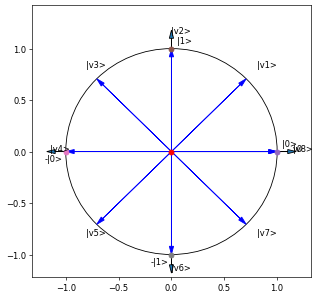

In [1]:
%run qlatvia.py

draw_qubit()

[x,y]=[1,0]

draw_quantum_state(x,y,"v0")

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

# we define a quantum circuit with one qubit and one bit
q =  QuantumRegister(1) # quantum register with a single qubit
c = ClassicalRegister(1) # classical register with a single bit
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

rotation_angle = pi/4

for i in range(1,9):
    # rotate the qubit with angle pi/4
    qc.ry(2*rotation_angle,q[0]) 
    
    # read the current quantum state
    job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0)
    current_quantum_state=job.result().get_statevector(qc) 
    
    # print the current quantum state    
    x_value = current_quantum_state[0].real # get the amplitude of |0>
    y_value = current_quantum_state[1].real # get the amplitude of |1>
    print("iteration",i,": the quantum state is (",round(x_value,3),") |0>","+(",round(y_value,3),") |1>")
    
    # draw the current quantum state
    draw_quantum_state(x_value,y_value,"|v"+str(i)+">")


<a id="task4"></a>
<h3> Task 4 </h3>

Repeat Task 3 for the angle $ \pi/6 $ by applying the rotation 12 times. 

Repeat Task 3 for the angle $ 3\pi/8 $ by applying the rotation 16 times. 

Repeat Task 3 for the angle $ \sqrt{2}\pi $ by applying the rotation 20 times. 

<h3>Solution</h3>

Repeat Task 3 for the angle $ \pi/6 $ by applying the rotation 12 times.

iteration 1 : the quantum state is ( 0.866 ) |0> +( 0.5 ) |1>
iteration 2 : the quantum state is ( 0.5 ) |0> +( 0.866 ) |1>
iteration 3 : the quantum state is ( 0.0 ) |0> +( 1.0 ) |1>
iteration 4 : the quantum state is ( -0.5 ) |0> +( 0.866 ) |1>
iteration 5 : the quantum state is ( -0.866 ) |0> +( 0.5 ) |1>
iteration 6 : the quantum state is ( -1.0 ) |0> +( 0.0 ) |1>
iteration 7 : the quantum state is ( -0.866 ) |0> +( -0.5 ) |1>
iteration 8 : the quantum state is ( -0.5 ) |0> +( -0.866 ) |1>
iteration 9 : the quantum state is ( -0.0 ) |0> +( -1.0 ) |1>
iteration 10 : the quantum state is ( 0.5 ) |0> +( -0.866 ) |1>
iteration 11 : the quantum state is ( 0.866 ) |0> +( -0.5 ) |1>
iteration 12 : the quantum state is ( 1.0 ) |0> +( -0.0 ) |1>


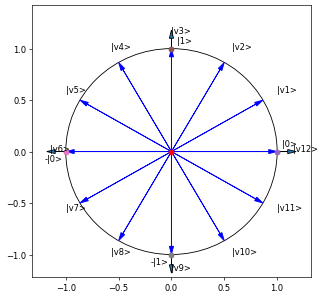

In [2]:
%run qlatvia.py

draw_qubit()

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

# we define a quantum circuit with one qubit and one bit
q =  QuantumRegister(1) # quantum register with a single qubit
c = ClassicalRegister(1) # classical register with a single bit
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

rotation_angle = pi/6

for i in range(1,13):
    # rotate the qubit with angle pi/4
    qc.ry(2*rotation_angle,q[0]) 
    
    # read the current quantum state
    job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0)
    current_quantum_state=job.result().get_statevector(qc) 
    
    # print the current quantum state    
    x_value = current_quantum_state[0].real # get the amplitude of |0>
    y_value = current_quantum_state[1].real # get the amplitude of |1>
    print("iteration",i,": the quantum state is (",round(x_value,3),") |0>","+(",round(y_value,3),") |1>")
    
    # draw the current quantum state
    draw_quantum_state(x_value,y_value,"|v"+str(i)+">")


Repeat Task 3 for the angle $ 3\pi/8 $ by applying the rotation 16 times.

iteration 1 : the quantum state is ( 0.383 ) |0> +( 0.924 ) |1>
iteration 2 : the quantum state is ( -0.707 ) |0> +( 0.707 ) |1>
iteration 3 : the quantum state is ( -0.924 ) |0> +( -0.383 ) |1>
iteration 4 : the quantum state is ( -0.0 ) |0> +( -1.0 ) |1>
iteration 5 : the quantum state is ( 0.924 ) |0> +( -0.383 ) |1>
iteration 6 : the quantum state is ( 0.707 ) |0> +( 0.707 ) |1>
iteration 7 : the quantum state is ( -0.383 ) |0> +( 0.924 ) |1>
iteration 8 : the quantum state is ( -1.0 ) |0> +( 0.0 ) |1>
iteration 9 : the quantum state is ( -0.383 ) |0> +( -0.924 ) |1>
iteration 10 : the quantum state is ( 0.707 ) |0> +( -0.707 ) |1>
iteration 11 : the quantum state is ( 0.924 ) |0> +( 0.383 ) |1>
iteration 12 : the quantum state is ( 0.0 ) |0> +( 1.0 ) |1>
iteration 13 : the quantum state is ( -0.924 ) |0> +( 0.383 ) |1>
iteration 14 : the quantum state is ( -0.707 ) |0> +( -0.707 ) |1>
iteration 15 : the quantum state is ( 0.383 ) |0> +( -0.924 ) |1>
iteration 16 : the quantum stat

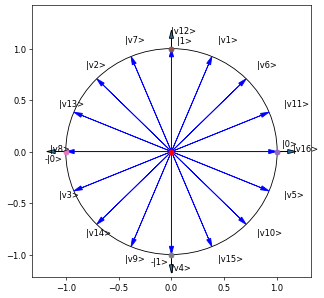

In [3]:
%run qlatvia.py

draw_qubit()

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

# we define a quantum circuit with one qubit and one bit
q =  QuantumRegister(1) # quantum register with a single qubit
c = ClassicalRegister(1) # classical register with a single bit
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

rotation_angle = 3*pi/8

for i in range(1,17):
    # rotate the qubit with angle pi/4
    qc.ry(2*rotation_angle,q[0]) 
    
    # read the current quantum state
    job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0)
    current_quantum_state=job.result().get_statevector(qc) 
    
    # print the current quantum state    
    x_value = current_quantum_state[0].real # get the amplitude of |0>
    y_value = current_quantum_state[1].real # get the amplitude of |1>
    print("iteration",i,": the quantum state is (",round(x_value,3),") |0>","+(",round(y_value,3),") |1>")
    
    # draw the current quantum state
    draw_quantum_state(x_value,y_value,"|v"+str(i)+">")


Repeat Task 3 for the angle $ \sqrt{2}\pi $ by applying the rotation 20 times. 

iteration 1 : the quantum state is ( 0.156 ) |0> +( 0.988 ) |1>
iteration 2 : the quantum state is ( -0.951 ) |0> +( 0.308 ) |1>
iteration 3 : the quantum state is ( -0.453 ) |0> +( -0.892 ) |1>
iteration 4 : the quantum state is ( 0.81 ) |0> +( -0.586 ) |1>
iteration 5 : the quantum state is ( 0.705 ) |0> +( 0.709 ) |1>
iteration 6 : the quantum state is ( -0.59 ) |0> +( 0.807 ) |1>
iteration 7 : the quantum state is ( -0.889 ) |0> +( -0.457 ) |1>
iteration 8 : the quantum state is ( 0.313 ) |0> +( -0.95 ) |1>
iteration 9 : the quantum state is ( 0.987 ) |0> +( 0.161 ) |1>
iteration 10 : the quantum state is ( -0.005 ) |0> +( 1.0 ) |1>
iteration 11 : the quantum state is ( -0.989 ) |0> +( 0.151 ) |1>
iteration 12 : the quantum state is ( -0.303 ) |0> +( -0.953 ) |1>
iteration 13 : the quantum state is ( 0.894 ) |0> +( -0.448 ) |1>
iteration 14 : the quantum state is ( 0.582 ) |0> +( 0.813 ) |1>
iteration 15 : the quantum state is ( -0.712 ) |0> +( 0.702 ) |1>
iteration 16 : the quantu

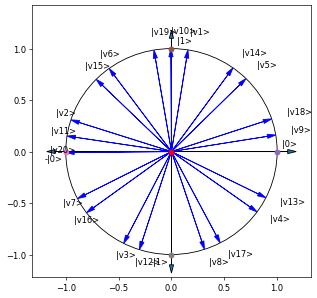

In [4]:
%run qlatvia.py

draw_qubit()

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

# we define a quantum circuit with one qubit and one bit
q =  QuantumRegister(1) # quantum register with a single qubit
c = ClassicalRegister(1) # classical register with a single bit
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

rotation_angle = 2**(0.5)

for i in range(1,21):
    # rotate the qubit with angle pi/4
    qc.ry(2*rotation_angle,q[0]) 
    
    # read the current quantum state
    job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0)
    current_quantum_state=job.result().get_statevector(qc) 
    
    # print the current quantum state    
    x_value = current_quantum_state[0].real # get the amplitude of |0>
    y_value = current_quantum_state[1].real # get the amplitude of |1>
    print("iteration",i,": the quantum state is (",round(x_value,3),") |0>","+(",round(y_value,3),") |1>")
    
    # draw the current quantum state
    draw_quantum_state(x_value,y_value,"|v"+str(i)+">")


<a id="task6"></a>
<h3> Task 6 </h3>

We randomly pick an angle $ \theta \in [0,2\pi) $.

We have two separate qubits initially set to state $ \ket{0} $. 

The first qubit is rotated by the angle $ \theta $ and the second qubit is rotated by the angle $ \theta + \pi/2 $.

Implement each qubit and its rotation as a separate quantum circuit.

Then, read both quantum states and calculate their dot product.

Check the result of the dot product for different random angles.

<h3>Solution</h3>

In [5]:
from random import randrange
from math import pi
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer


# implement the experiment 10 times
for i in range(10):
    # pick a random angle
    random_angle = randrange(3600)/10

    # specify the angles
    rotation_angle1 = random_angle/360*2*pi
    rotation_angle2 = rotation_angle1 + pi/2
    
    #
    # first qubit
    #
    q1 =  QuantumRegister(1) 
    c1 = ClassicalRegister(1) 
    qc1 = QuantumCircuit(q1,c1)
    
    # rotate the qubit
    qc1.ry(2 * rotation_angle1,q1[0])
    
    # read the quantum state
    job = execute(qc1,Aer.get_backend('statevector_simulator'),optimization_level=0)
    current_quantum_state1=job.result().get_statevector(qc1) 
    [x1,y1]=[current_quantum_state1[0].real,current_quantum_state1[1].real]
    
    #
    # second qubit 
    #
    q2 =  QuantumRegister(1) 
    c2 = ClassicalRegister(1) 
    qc2 = QuantumCircuit(q2,c2)
    
    # rotate the qubit    
    qc2.ry(2 * rotation_angle2,q2[0])
        
    # read the quantum state
    job = execute(qc2,Aer.get_backend('statevector_simulator'),optimization_level=0)
    current_quantum_state2=job.result().get_statevector(qc2) 
    [x2,y2]=[current_quantum_state2[0].real,current_quantum_state2[1].real]

        
    #
    # dot product
    #
    print(i,"- the result of dot product is ",round(x1*x2+y1*y2,5))
    print("random angle is",random_angle)
    print("x1 , y1 =",round(x1,5),round(y1,5))
    print("x2 , y2 =",round(x2,5),round(y2,5))
    print()

0 - the result of dot product is  0.0
random angle is 19.2
x1 , y1 = 0.94438 0.32887
x2 , y2 = -0.32887 0.94438

1 - the result of dot product is  0.0
random angle is 216.2
x1 , y1 = -0.80696 -0.59061
x2 , y2 = 0.59061 -0.80696

2 - the result of dot product is  0.0
random angle is 198.2
x1 , y1 = -0.94997 -0.31233
x2 , y2 = 0.31233 -0.94997

3 - the result of dot product is  0.0
random angle is 229.1
x1 , y1 = -0.65474 -0.75585
x2 , y2 = 0.75585 -0.65474

4 - the result of dot product is  0.0
random angle is 138.7
x1 , y1 = -0.75126 0.66
x2 , y2 = -0.66 -0.75126

5 - the result of dot product is  0.0
random angle is 79.6
x1 , y1 = 0.18052 0.98357
x2 , y2 = -0.98357 0.18052

6 - the result of dot product is  0.0
random angle is 135.2
x1 , y1 = -0.70957 0.70463
x2 , y2 = -0.70463 -0.70957

7 - the result of dot product is  -0.0
random angle is 219.2
x1 , y1 = -0.77494 -0.63203
x2 , y2 = 0.63203 -0.77494

8 - the result of dot product is  0.0
random angle is 171.9
x1 , y1 = -0.99002 0.14

<a id="task7"></a>
<h3> Task 7 </h3>

We randomly pick an angle $ \theta \in [0,2\pi) $.

We have a single qubit initially set to state $ \ket{0} $. 

The qubit is rotated by the angle either $ \theta_1 =  \theta $ or $ \theta_2 =  \theta-\pi/2 $.

You are allowed to do one more rotation $ \theta' $ and then make a measurement.

Can you determine the angle of the first rotation angle by looking/using the measurement result? Is it $ \theta_1 $ or $ \theta_2 $?

Check your solution for different random angles.

<h3>Solution</h3>

In [ ]:
from random import randrange
from math import pi
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

random_angle = randrange(3600)/10
rotation_angle1 = random_angle/360*2*pi
rotation_angle2 = rotation_angle1 - pi/2

# we define a quantum circuit with one qubit and one bit
q =  QuantumRegister(1) # quantum register with a single qubit
c = ClassicalRegister(1) # classical register with a single bit
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

if randrange(2)==0:
    qc.ry(2 * rotation_angle1,q[0])
    picked_angle = "theta1"
else:
    qc.ry(2 * rotation_angle2,q[0])
    picked_angle = "theta2"

#
# your code is here
#
your_guess = ""

qc.ry(-2 * rotation_angle1,q[0]) # the new state will be either |0> or -|1>

qc.measure(q,c)

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc)
print(counts)

if '0' in counts:
    your_guess = "theta1"
else:
    your_guess = "theta2"


######################
print("your guess is",your_guess)
print("picked_angle is",picked_angle)